In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px

df = pd.read_csv('Allstatesinsurvey/all_deaths.csv', encoding='cp1252')

ModuleNotFoundError: No module named 'plotly'

In [35]:
df.head()

,id,state,county,jail,year,date_of_death,full_name,last_name,first_name,mid_name,...,cause_short,cause_detail,dob,yob,age,race,race_detail,gender,custody_status,what_info_from_media
0,1.0,AL,Baldwin,Baldwin County Corr. Center,2010,NaN,NaN,NaN,NaN,NaN,...,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,AL,Baldwin,Baldwin County Corr. Center,2011,NaN,NaN,NaN,NaN,NaN,...,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,AL,Baldwin,Baldwin County Corr. Center,2015,NaN,NaN,NaN,NaN,NaN,...,DA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,AL,Baldwin,Baldwin County Corr. Center,2015,NaN,NaN,NaN,NaN,NaN,...,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,AL,Baldwin,Baldwin County Corr. Center,2018,NaN,NaN,NaN,NaN,NaN,...,M,Acute Bronchopneumonia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# general info about dataset

df_len = len(df)
print("length of df: ", df_len)

print("list of columns: ", df.columns)

# number of non NA vals per col

known_causes = df[df['cause_detail'].notna()]
print("cases where causes of death are known: ", len(known_causes))

known_year = df[df['year'].notna()]
print("cases where year of death is known: ", len(known_year))

known_age = df[df['age'].notna()]
print("cases where age of victim is known: ", len(known_age))

length of df:  7571
list of columns:  Index(['id', 'state', 'county', 'jail', 'year', 'date_of_death', 'full_name',
       'last_name', 'first_name', 'mid_name', 'suffix', 'date_incarcerated',
       'cause_short', 'cause_detail', 'dob', 'yob', 'age', 'race',
       'race_detail', 'gender', 'custody_status', 'what_info_from_media'],
      dtype='object')
cases where causes of death are known:  6120
cases where year of death is known:  7571
cases where age of victim is known:  3325


In [29]:
# race info

races = df[df['race'].notna()]
print("cases where race is known: ", len(races))
print("unique races: ", races['race'].unique())
count_by_race = races.groupby('race')['id'].count()
print("counts of instances of death grouped by race: ", count_by_race)
race_details = df[df['race_detail'].notna()]
print("cases where race detail is known: ", len(race_details))
print("unique race details: ", race_details['race_detail'].unique())

cases where race is known:  6899
unique races:  ['B' 'W' 'H' 'AI' 'A' 'O' 'PI']
counts of instances of death grouped by race:  race
A       82
AI      72
B     2133
H      879
O       31
PI      11
W     3690
Name: id, dtype: int64
cases where race detail is known:  36
unique race details:  ['Other Asian' 'Asian Indian' 'Korean' 'Vietnamese' 'Filipino' 'Hawaiian'
 'State says W, county says B' 'Chinese' 'Guamanian' 'Bangladeshi'
 'White Hispanic' 'Cuban' 'Liberian' 'Antigua-Barbuda' 'multi-racial']


count of deaths by state:  state
AL      80
AR      71
AZ     195
CA    1221
CO     185
DC      52
FL     739
GA     272
IA      33
ID      40
Name: id, dtype: int64
count of deaths by county:  county
Ada                                                                   11
Adams                                                                 27
Aiken                                                                 11
Alachua                                                               16
Alameda                                                               83
Allegheny                                                             43
Allen                                                                 12
Amelia, Buckingham, Cumberland, Lunenburg, Nottoway, Prince Edward    11
Anderson                                                               5
Androscoggin                                                           4
Name: id, dtype: int64
# of counties:  404
count of deaths by year:  

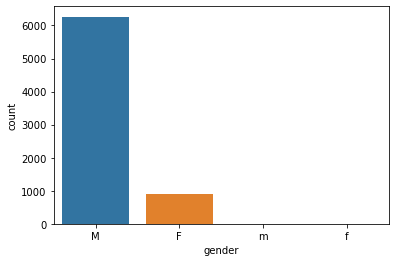

In [26]:
# groupby

states = df.groupby('state')['id'].count()
print("count of deaths by state: ", states[:10])

counties = df.groupby('county')['id'].count()
print("count of deaths by county: ", counties[:10])
print("# of counties: ", len(counties))

years = df.groupby('year')['id'].count()
print("count of deaths by year: ", years)

gender = df.groupby('gender')['id'].count()
print("count of deaths by gender: ", gender)

age = df.groupby('age')['id'].count()
print("count of deaths by age: ", age)
print("max age: ", np.amax(df['age']))
print("min age: ", np.amin(df['age']))
print("avg age: ", np.mean(df['age']))

plt1 = sns.countplot(x=df["gender"])

In [34]:
# north carolina 

nc = df[df['state']=='NC']
print("len(nc) = ", len(nc))
nc_gender = nc.groupby('gender')['id'].count()
print("nc_gender = ", nc_gender)
nc_age = nc.groupby('age')['id'].count()
print("nc_age = ", nc_age)
nc_year = nc.groupby('year')['id'].count()

len(nc) =  120
nc_gender =  gender
F     19
M    101
Name: id, dtype: int64
nc_age =  age
17.0    1
18.0    1
19.0    2
21.0    1
22.0    1
23.0    2
25.0    1
26.0    3
27.0    1
28.0    2
29.0    2
30.0    3
32.0    1
33.0    2
34.0    2
35.0    3
36.0    1
37.0    2
38.0    2
39.0    3
40.0    6
41.0    1
42.0    3
43.0    2
44.0    4
45.0    2
46.0    1
47.0    2
48.0    1
49.0    1
50.0    2
51.0    4
52.0    4
53.0    2
54.0    2
55.0    5
56.0    4
57.0    2
59.0    1
60.0    1
61.0    2
64.0    2
66.0    1
71.0    1
73.0    1
75.0    1
Name: id, dtype: int64
